In [ ]:
import sys, os
sys.path.insert(0, os.path.join(os.path.abspath(sys.path[0]), "..", "lib"))
import numpy as np
import seaborn as sns

In [ ]:
# pygooglechart is a library that can be used to access google charts. Here, used to create 3D pie charts
# !pip install pygooglechart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pygooglechart: filename=pygooglechart-0.4.0-py3-none-any.whl size=22009 sha256=74c24759ea3d8a7eb755c0b634a1ac61fadd4447326c4b606ff93df481659e74
  Stored in directory: /root/.cache/pip/wheels/2b/17/e1/baf488241d1930de013c1795ddbd78291bd41bb8b206f1ce55
Successfully built pygooglechart


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from pygooglechart import PieChart3D
#from pychartdir import *

In [ ]:
df = pd.read_csv("/content/2023-02-27-yc-companies.csv")
df.head(14)

,company_id,company_name,short_description,long_description,batch,status,tags,location,country,year_founded,num_founders,founders_names,team_size,website,cb_url,linkedin_url
0,28425,Pando Bioscience,Decipher complex diseases using protein networks,Pando Bioscience is a Boston-based synthetic b...,W23,Active,"['Drug discovery', 'Biotech', 'Diagnostics', '...",Boston,US,2022.0,2,"['Will (Yangxiaolu) Cao', 'Yang Wang']",3.0,https://,NaN,NaN
1,28421,Apollo Group,A marketplace for consumers to hire trained bl...,Apollo Group is a diversified technology group...,W23,Active,"['Home Services', 'International', 'Marketplac...","Lahore, Pakistan",PK,2023.0,1,['Usman Gul'],8.0,http://www.apollo-group.io,https://www.crunchbase.com/organization/apollo...,https://www.linkedin.com/in/gulsf/
2,28416,Pierre,A new way to review code,"Pierre enables engineers, designers and busine...",W23,Active,"['Developer Tools', 'Collaboration', 'AI-Enhan...",San Francisco,US,2023.0,2,"['Ian Ownbey', 'Jacob Thornton']",2.0,https://heypierre.app,NaN,NaN
3,28415,moonrepo,A developer productivity platform for managing...,moonrepo is a developer tool that reduces buil...,W23,Active,"['Developer Tools', 'SaaS', 'Open Source', 'En...","Portland, OR",US,2022.0,2,"['Miles Johnson', 'James Pozdena']",2.0,https://moonrepo.dev,NaN,https://www.linkedin.com/company/moonrepo/
4,28414,Lasso,robotic process automation for chrome using GP...,🧐 The problem: Traditional Robotic Process Aut...,W23,Active,"['Generative AI', 'B2B', 'SaaS', 'Developer To...",San Francisco,US,2023.0,2,"['Gautam Bose', 'Lucas Ochoa']",2.0,https://www.getlassoai.com/,NaN,NaN
5,28413,SpecCheck,Unifying how the optical industry does business.,SpecCheck is an all-in-one solution that provi...,W23,Active,"['Health Tech', 'SaaS', 'B2B', 'API', 'Payments']","Los Angeles, CA",US,2022.0,2,"['Joe DeMaria', 'Arnold Villatoro']",3.0,https://www.speccheckrx.com/,NaN,https://www.linkedin.com/company/speccheck/
6,28412,SpeedyBrand,Digital marketing solution for SMBs powered by...,SpeedyBrand provides small business owners wit...,W23,Active,"['SEO', 'Advertising', 'Generative AI']",San Francisco,US,2023.0,3,"['Ayush Jasuja', 'Jatin Mehta', 'Ranti Dev Sha...",3.0,https://speedybrand.io,NaN,https://www.linkedin.com/company/89983427/
7,28410,Porter,Accounting platform for software companies fro...,Porter is an accounting software and services ...,W23,Active,"['B2B', 'SaaS']",San Francisco,US,2023.0,2,"['Jordan Vincent', 'Andy Wang']",2.0,https://www.porter.software/,NaN,https://www.linkedin.com/company/portersoftware/
8,28409,BerriAI,Retool for LLM Apps 👉 pip install berri-ai,BerriAI is a platform that allows you to inges...,W23,Active,"['Artificial Intelligence', 'Generative AI', '...",San Francisco,US,2023.0,2,"['Krrish Dholakia', 'Ishaan Jaffer']",2.0,https://berri.ai/,NaN,https://www.linkedin.com/company/berri-ai/
9,28372,Upfront,Turning rebates into instantly lower prices,Upfront helps merchants that sell clean energy...,W23,Active,"['SaaS', 'Fintech', 'Climate']",San Francisco,US,2023.0,2,"['Andrew Hoskins', 'Thomas Stephens']",2.0,https://knowupfront.com,NaN,https://www.linkedin.com/company/knowupfront


In [ ]:
# Removing unnecessary columns from the dataframe
df = df.drop(["cb_url", "linkedin_url", "founders_names","company_id", "long_description", "website" ], axis = 1)
# df.columns

In [ ]:
# The number of companies without description
df['short_description'].isna().sum()


193

In [ ]:
df


,company_name,short_description,batch,status,tags,location,country,year_founded,num_founders,team_size
0,Pando Bioscience,Decipher complex diseases using protein networks,W23,Active,"['Drug discovery', 'Biotech', 'Diagnostics', '...",Boston,US,2022.0,2,3.0
1,Apollo Group,A marketplace for consumers to hire trained bl...,W23,Active,"['Home Services', 'International', 'Marketplac...","Lahore, Pakistan",PK,2023.0,1,8.0
2,Pierre,A new way to review code,W23,Active,"['Developer Tools', 'Collaboration', 'AI-Enhan...",San Francisco,US,2023.0,2,2.0
3,moonrepo,A developer productivity platform for managing...,W23,Active,"['Developer Tools', 'SaaS', 'Open Source', 'En...","Portland, OR",US,2022.0,2,2.0
4,Lasso,robotic process automation for chrome using GP...,W23,Active,"['Generative AI', 'B2B', 'SaaS', 'Developer To...",San Francisco,US,2023.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...
4123,TextPayMe,NaN,S05,Acquired,[],"Redmond, WA",US,NaN,1,11.0
4124,Loopt,NaN,S05,Acquired,[],Mountain View,US,NaN,2,11.0
4125,Infogami,NaN,S05,Inactive,[],"London, United Kingdom",GB,NaN,1,2.0
4126,Memamp,NaN,S05,Inactive,[],"Somerville, MA",US,NaN,1,0.0


In [ ]:
df.columns

Index(['company_name', 'short_description', 'batch', 'status', 'tags',
       'location', 'country', 'year_founded', 'num_founders', 'team_size'],
      dtype='object')

In [ ]:
df['status'].unique()


array(['Active', 'Acquired', 'Inactive', 'Public'], dtype=object)

In [ ]:
df_active = df.loc[df['status'] == 'Active']
df_active

,company_name,short_description,batch,status,tags,location,country,year_founded,num_founders,team_size
0,Pando Bioscience,Decipher complex diseases using protein networks,W23,Active,"['Drug discovery', 'Biotech', 'Diagnostics', '...",Boston,US,2022.0,2,3.0
1,Apollo Group,A marketplace for consumers to hire trained bl...,W23,Active,"['Home Services', 'International', 'Marketplac...","Lahore, Pakistan",PK,2023.0,1,8.0
2,Pierre,A new way to review code,W23,Active,"['Developer Tools', 'Collaboration', 'AI-Enhan...",San Francisco,US,2023.0,2,2.0
3,moonrepo,A developer productivity platform for managing...,W23,Active,"['Developer Tools', 'SaaS', 'Open Source', 'En...","Portland, OR",US,2022.0,2,2.0
4,Lasso,robotic process automation for chrome using GP...,W23,Active,"['Generative AI', 'B2B', 'SaaS', 'Developer To...",San Francisco,US,2023.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...
4052,RescueTime,Take Back Control of your Time,W08,Active,"['SaaS', 'Developer Tools']","Seattle, WA",US,2007.0,2,15.0
4071,Blue Frog Gaming,NaN,S07,Active,[],"Akron, OH",US,NaN,2,11.0
4091,Buxfer,Buxfer helps you make better spending decision...,W07,Active,['Fintech'],"Santa Clara, CA",US,2006.0,1,1.0
4092,Virtualmin,NaN,W07,Active,[],Mountain View,US,NaN,2,2.0


In [ ]:
df_acq_public = df.loc[(df['status'] == 'Acquired') | (df['status'] == 'Public')]
df_acq = df.loc[df['status'] == 'Acquired']
df_public = df.loc[df['status'] == 'Public']

df_acq_public

,company_name,short_description,batch,status,tags,location,country,year_founded,num_founders,team_size
841,TAI,Control All of Your Investments from a Single App,W22,Acquired,"['Consumer', 'Investing', 'Fintech']",San Francisco,US,2020.0,2,3.0
1224,Verano Health,Nonprofit telehealth coaches for underserved A...,S21,Acquired,"['Mental Health Tech', 'Healthcare IT', 'Consu...",San Francisco,US,2019.0,2,3.0
1225,Level,Fast and simple fintech financing,S21,Acquired,"['Fintech', 'Lending']",San Francisco,US,2021.0,3,5.0
1547,inBalance,Electricity price forecasts for energy storage...,W21,Acquired,"['Energy Storage', 'SaaS', 'Climate']","Cambridge, MA",US,2020.0,1,10.0
1548,Worksphere,Manage your hybrid workplace,W21,Acquired,"['SaaS', 'B2B']","Seattle, WA",US,2020.0,3,6.0
...,...,...,...,...,...,...,...,...,...,...
4120,Reddit,The frontpage of the internet.,S05,Acquired,"['Community', 'Social', 'Social Media', 'Socia...",San Francisco,US,NaN,1,201.0
4121,Kiko,We're the best online calendar solution to eve...,S05,Acquired,['Calendar'],"Cambridge, MA",US,2005.0,1,0.0
4122,Clickfacts,NaN,S05,Acquired,[],San Francisco,US,NaN,2,11.0
4123,TextPayMe,NaN,S05,Acquired,[],"Redmond, WA",US,NaN,1,11.0


In [ ]:
df_failed = df.loc[(df['status'] == 'Inactive')]
df_failed

Int64Index([ 842,  843,  844, 1226, 1227, 1228, 1229, 1230, 1231, 1232,
            ...
            4109, 4110, 4111, 4112, 4117, 4118, 4119, 4125, 4126, 4127],
           dtype='int64', length=643)

In [ ]:
print(len(df.index))
print(len(df_active.index))
#print(len(df_acq_public.index))
print(len(df_acq.index))
print(len(df_public.index))
print(len(df_failed.index))


yc_companies_status = [len(df_active.index),len(df_public.index),len(df_acq.index),len(df_failed.index)]


4128
3003
466
16
643


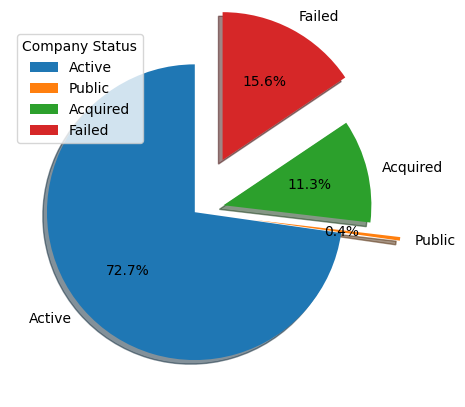

In [ ]:
# Pie chart representing the active, acquired, public and inactive companies over the years

# Using Google charts library called pygooglechart
# chart = PieChart3D(640,640)
# chart.add_data([len(df_active.index),len(df_public.index),len(df_acq.index),len(df_failed.index)])
# chart.set_pie_labels("Active Public Acquired Failed".split())
# #chart.download('yc_companies_status.png')
# chart_url = chart.get_url()
# print(chart_url)

# # 3D Pie graph
# plt.pie(yc_companies_status, labels = ["Active", "Public", "Acquired", "Failed"], colors = ["Yellow", "Green", "Blue", "Red"], explode = [0, 0.4, 0.2, 0.4], shadow = True);
# plt.legend(title = "Company Status");
# plt.show()

# 3D Pie graph With Default colour
plt.pie(yc_companies_status, labels = ["Active", "Public", "Acquired", "Failed"], explode = [0, 0.4, 0.2, 0.4],autopct='%1.1f%%', shadow = True, startangle=90);
plt.legend(title = "Company Status");
plt.show()

# # 2D Pie graph
# plt.pie(yc_companies_status, labels = ["Active", "Public", "Acquired", "Failed"], colors = ["Yellow", "Green", "Blue", "Red"], explode = [0, 0.4, 0.2, 0.4]);
# plt.legend(title = "Company Status");
# plt.show()


In [ ]:
# Pie chart of sectors in the active yc companies based on "tags" column

# df_active.plot(kind = 'pie' , y = 'tags', figsize = (5,5))

df_active_sectors = df_active["tags"].tolist()
print(df_active_sectors)

["['Drug discovery', 'Biotech', 'Diagnostics', 'Synthetic Biology']", "['Home Services', 'International', 'Marketplace', 'Consumer']", "['Developer Tools', 'Collaboration', 'AI-Enhanced Learning', 'B2B', 'Productivity']", "['Developer Tools', 'SaaS', 'Open Source', 'Enterprise', 'Productivity']", "['Generative AI', 'B2B', 'SaaS', 'Developer Tools', 'Artificial Intelligence']", "['Health Tech', 'SaaS', 'B2B', 'API', 'Payments']", "['SEO', 'Advertising', 'Generative AI']", "['B2B', 'SaaS']", "['Artificial Intelligence', 'Generative AI', 'Developer Tools']", "['SaaS', 'Fintech', 'Climate']", "['Payroll', 'B2B', 'Fintech', 'Compliance']", "['B2B', 'SaaS', 'Developer Tools', 'Generative AI']", "['Developer Tools', 'Open Source', 'Collaboration', 'No-code']", "['Consumer', 'Delivery', 'E-commerce', 'Food Tech']", "['Artificial Intelligence', 'Documents', 'Generative AI']", "['AIOps', 'Generative AI', 'Developer Tools']", "['Manufacturing', 'SaaS', 'Analytics']", "['Generative AI', 'B2B', 'Se

In [ ]:
df_active["team_size"].dtype

team_5 = df_active[df_active["team_size"] <= 5.0]
team_5_20 = df_active[(df_active["team_size"] > 5.0) & (df_active["team_size"] <= 20.0)]
team_20_50 = df_active[(df_active["team_size"] > 20.0) & (df_active["team_size"] <= 50.0)]
team_50_more = df_active[df_active["team_size"] > 50.0]

In [ ]:
print(len(team_5))
print(len(team_5_20))
print(len(team_20_50))
print(len(team_50_more))


active_comp_teamsize = [ len(team_5), len(team_5_20), len(team_20_50), len(team_50_more)]

1049
1051
419
440


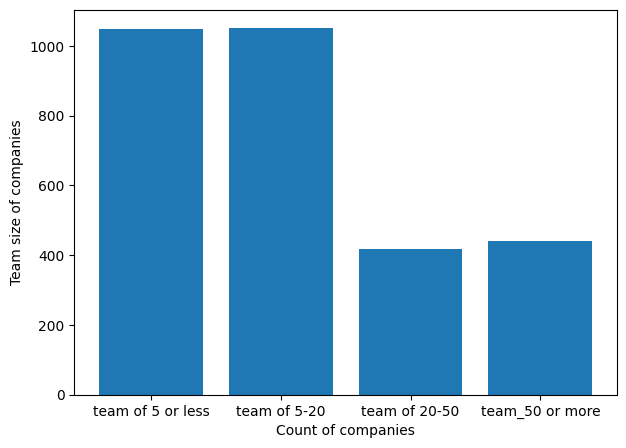

In [ ]:

active_comp_teamsize_labels = [ "team of 5 or less", "team of 5-20", "team of 20-50", "team_50 or more"]

fig = plt.figure(figsize = (7,5));
plt.bar(active_comp_teamsize_labels, active_comp_teamsize);
plt.xlabel("Count of companies");
plt.ylabel("Team size of companies");

In [ ]:
df_count = df.pivot_table(columns = ['batch'], aggfunc = 'size')
df_count.to_csv(path_or_buf = "/content/comp_count.csv")

In [ ]:
df_country = df.pivot_table(columns = ['country', 'batch'], aggfunc = 'size')
df_country = df_country.to_frame()
df_country = df_country.sort_values(by = ['batch'])
df_country.to_csv(path_or_buf = "/content/country_count.csv")

In [ ]:
df_country_year = df
df_country_year = df_country_year.replace({'batch' : { 'W05' : 2005, 'S05' : 2005,'W06' : 2006, 'S06' : 2006,'W07' : 2007, 'S07' : 2007,'W08' : 2008, 'S08' : 2008, 'W09' : 2009, 'S09' : 2009, 'W10' : 2010, 'S10' : 2010, 'W11' : 2011, 'S11' : 2011,'W12' : 2012, 'S12' : 2012, 'W13' : 2013, 'S13' : 2013,'W14' : 2014, 'S14' : 2014,
                                    'W15' : 2015, 'S15' : 2015,'W16' : 2016, 'S16' : 2016,'W17' : 2017, 'S17' : 2017,'W18' : 2018, 'S18' : 2018,'W19' : 2019, 'S19' : 2019,
                                    'W20' : 2020, 'S20' : 2020,'W21' : 2021, 'S21' : 2021,'W22' : 2022, 'S22' : 2022,'W23' : 2023,'IK12' : 2012, 'IK12' : 2012,
                                    'IK12' : 2012, 'IK12' : 2012}})


In [ ]:
df_country_year = df_country_year.pivot_table(columns = ['country', 'batch'], aggfunc = 'size')
df_country_year = df_country_year.to_frame()
df_country_year = df_country_year.sort_values(by = ['batch'])

df_country_year.to_csv(path_or_buf = "/content/countries_per_year.csv")


In [ ]:
# df_country_year = df_country_year.to_frame()
df['country'].unique()

array(['US', 'PK', 'CA', 'IL', nan, 'CO', 'NG', 'AU', 'MX', 'HK', 'DE',
       'CH', 'ID', 'SA', 'FR', 'BR', 'AE', 'UY', 'CL', 'GB', 'SG', 'IN',
       'ES', 'TR', 'PE', 'PH', 'IE', 'NL', 'PA', 'KE', 'GH', 'AR', 'JP',
       'ET', 'VN', 'TW', 'KR', 'VE', 'BH', 'UG', 'SE', 'NO', 'MY', 'DK',
       'CR', 'FI', 'NZ', 'EG', 'PT', 'EE', 'GE', 'MA', 'ZA', 'CY', 'PL',
       'ZM', 'RO', 'EC', 'AT', 'SN', 'LT', 'HR', 'IT', 'SI', 'BE', 'DZ',
       'TZ', 'CN', 'SC', 'IQ', 'GR', 'CZ', 'PR', 'LV', 'HU', 'RU', 'BD',
       'NP', 'TH'], dtype=object)

In [ ]:
df

,company_name,short_description,batch,status,tags,location,country,year_founded,num_founders,team_size
0,Pando Bioscience,Decipher complex diseases using protein networks,W23,Active,"['Drug discovery', 'Biotech', 'Diagnostics', '...",Boston,US,2022.0,2,3.0
1,Apollo Group,A marketplace for consumers to hire trained bl...,W23,Active,"['Home Services', 'International', 'Marketplac...","Lahore, Pakistan",PK,2023.0,1,8.0
2,Pierre,A new way to review code,W23,Active,"['Developer Tools', 'Collaboration', 'AI-Enhan...",San Francisco,US,2023.0,2,2.0
3,moonrepo,A developer productivity platform for managing...,W23,Active,"['Developer Tools', 'SaaS', 'Open Source', 'En...","Portland, OR",US,2022.0,2,2.0
4,Lasso,robotic process automation for chrome using GP...,W23,Active,"['Generative AI', 'B2B', 'SaaS', 'Developer To...",San Francisco,US,2023.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...
4123,TextPayMe,NaN,S05,Acquired,[],"Redmond, WA",US,NaN,1,11.0
4124,Loopt,NaN,S05,Acquired,[],Mountain View,US,NaN,2,11.0
4125,Infogami,NaN,S05,Inactive,[],"London, United Kingdom",GB,NaN,1,2.0
4126,Memamp,NaN,S05,Inactive,[],"Somerville, MA",US,NaN,1,0.0


In [ ]:
df_cities = df["location"].value_counts().sort_values(ascending=False)
df_cities = df_cities.head(10) # Plotting only top 10 values individualy 

df_cities = df_cities.to_frame()


In [ ]:
# In total 386 cities, YC has invested till date

df_cities = df_cities.rename(columns = {'location':"no_of_companies"})
#df_cities = df_cities.rename(columns = {0 : "City names"}, inplace =True)

#Adding a latitude and longitude column for the top 10 cities

df_cities["latitude"] = ["37.774929","40.712776","12.971599","34.052235","51.507351","37.4419","37.3861","43.6532","23.6345","42.3601"]
df_cities["longitude"] = ["-122.419418","-74.005974","77.594566","-118.243683","-0.127758","122.1430","122.0839","79.3832","102.5528","71.0589"]

df_cities.to_csv("/content/YC_10_major_cities_with_lat_long.csv")
df_cities


,no_of_companies,latitude,longitude
San Francisco,1325,37.774929,-122.419418
New York,360,40.712776,-74.005974
"Bengaluru, India",111,12.971599,77.594566
"Los Angeles, CA",110,34.052235,-118.243683
"London, United Kingdom",108,51.507351,-0.127758
Palo Alto,95,37.4419,122.1430
Mountain View,79,37.3861,122.0839
"Toronto, Canada",77,43.6532,79.3832
"Mexico City, Mexico",58,23.6345,102.5528
Boston,56,42.3601,71.0589


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

<ipython-input-81-e2ea4c155047>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(x, y, alpha=0.6, vmin=0, vmax=threshold,


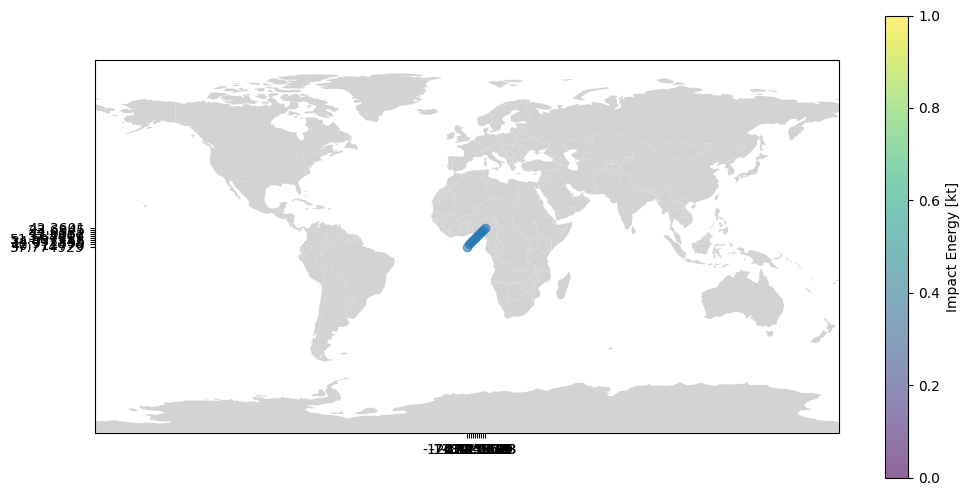

In [ ]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
threshold = 20

# Plotting our Impact Energy data with a color map
x = df_cities['longitude']
y = df_cities['latitude']
#z = df_cities['no_of_companies']
plt.scatter(x, y, alpha=0.6, vmin=0, vmax=threshold,
            cmap='autumn')
plt.colorbar(label='Impact Energy [kt]')


# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.show();

<Figure size 700x500 with 0 Axes>

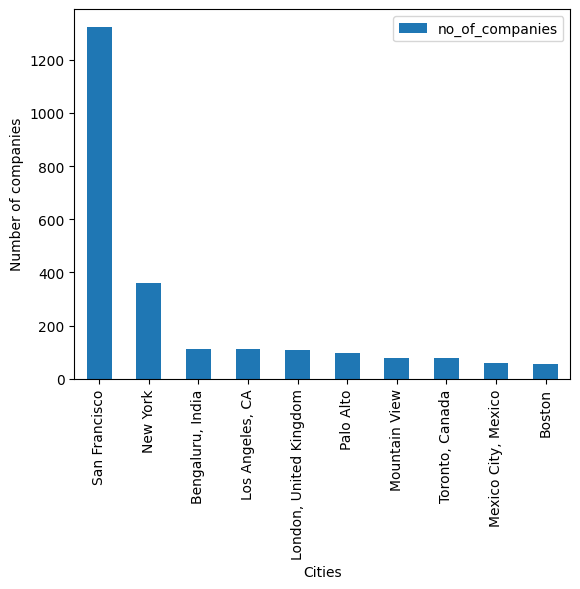

In [ ]:

fig = plt.figure(figsize = (7,5));
df_cities.plot.bar( y = "no_of_companies", use_index = True);
# # plt.bar(active_comp_teamsize_labels, active_comp_teamsize);
plt.xlabel("Cities");
plt.ylabel("Number of companies");